# Medical Cost Personal Datasets
This dataset is taken from Kaggle: [Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance)

## EDA
Lets explore the dataset and find interesting things we can find in the dataset.

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load dataset and save to df

df = pd.read_csv("data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.shape

(1338, 7)

We have 1338 rows of data and 7 columns of which 4 are categorical: `sex`, `smoker`, `region`, and `children`

In [7]:
# Check proportion of smokers and non-smokers in dataset.
round(df["smoker"].value_counts(normalize=True)*100,2)

no     79.52
yes    20.48
Name: smoker, dtype: float64

In [8]:
# Check proportion of region in dataset.
round(df["region"].value_counts(normalize=True)*100,2)

southeast    27.20
northwest    24.29
southwest    24.29
northeast    24.22
Name: region, dtype: float64

In [9]:
# Check proportion of gender in dataset.
round(df["sex"].value_counts(normalize=True)*100,2)

male      50.52
female    49.48
Name: sex, dtype: float64

The proportion of dataset is fairly balanced except for `smoker` status.
~80% of our dataset are non-smokers

Let's see some correlation between our features and `charges` which is our target

In [10]:
df.corr()["charges"].sort_values()

children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64

This doesn't include categorical features like `smoker` status which may have correlation with `charges`. Let's encode the categorical features.

In [11]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
encoded_df = df.copy()
enc.fit(df["sex"])
encoded_df["sex"] = enc.transform(df["sex"])
enc.fit(df["smoker"])
encoded_df["smoker"] = enc.transform(df["smoker"])
enc.fit(df["region"])
encoded_df["region"] = enc.transform(df["region"])
encoded_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Now that we have encoded the categorical features into numerics, let's see the correlation between features and `charges` again.

In [12]:
encoded_df.corr()["charges"].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

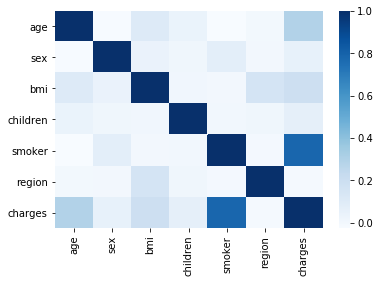

In [13]:
sns.heatmap(encoded_df.corr(), cmap = "Blues")

We can see that `smoker` has a strong correlation with the `charges`. 

In [14]:
df.groupby("smoker")["charges"].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

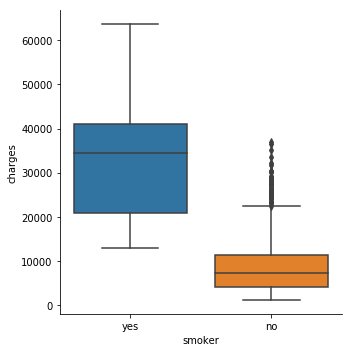

In [15]:
sns.catplot(x="smoker", y="charges", kind="box", data=df)

Despite the fact that ~80% of our dataset are non-smokers, the average `charges` show signficant difference between smokers and non-smokers.

Let's look at the proportion of people with `children`, `sex`, `bmi` to `smokers`. But first we will categorized `bmi` into 4 categories and make a new column `bmi_chart` based on the commonly accepted BMI ranges which are underweight: under 18.5 kg/m2, normal weight: 18.5 to 25, overweight: 25 to 30, obese: over 30.

In [16]:
def bmi_chart(row):
    if row['bmi'] < 18.5:
        val = "underweight"
    elif row['bmi'] > 30:
        val = "obese"
    elif row["bmi"] > 25:
        val = "overweight"
    else:
        val = "normal"
    return val

df["bmi_chart"] = df.apply(bmi_chart, axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_chart
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight


Text(0.5, 1.0, 'Smokers who are obese have higher charges as compared to non-smokers and other BMI categories')

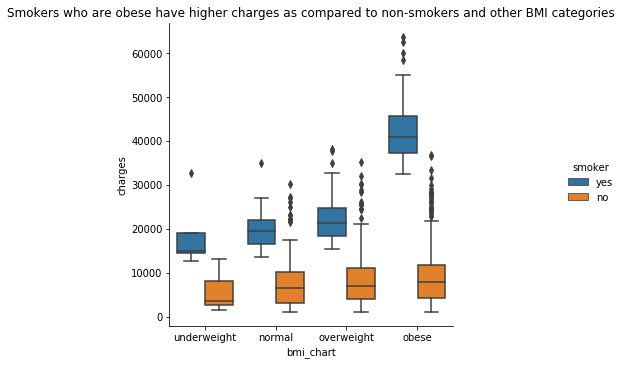

In [19]:
sns.catplot(x="bmi_chart", y="charges", data=df, hue="smoker", kind="box", 
            order=["underweight", "normal", "overweight", "obese"])
plt.title("Smokers who are obese have higher charges as compared to non-smokers and other BMI categories")

Text(0.5, 1.0, 'Smokers with different no of children does not correlate with the charges')

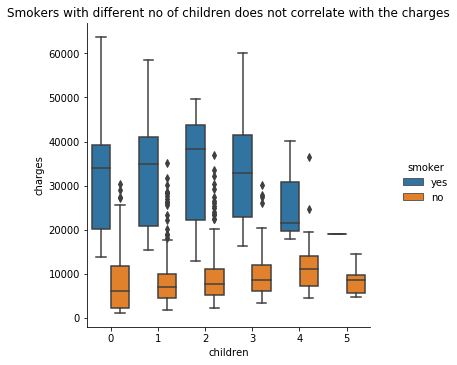

In [48]:
sns.catplot(x="children", y = "charges", data=df, hue="smoker", kind= "box")
plt.title("Smokers with different no of children does not correlate with the charges")

In [50]:
df.loc[(df.loc[:, "children"]==5) & (df.loc[:, "smoker"]=="yes"), :]

,age,sex,bmi,children,smoker,region,charges,bmi_chart,age_group
1085,39,female,18.3,5,yes,southwest,19023.26,underweight,gen x


Text(0.5, 1.0, "Smokers' gender doesn't have any effect on the charges")

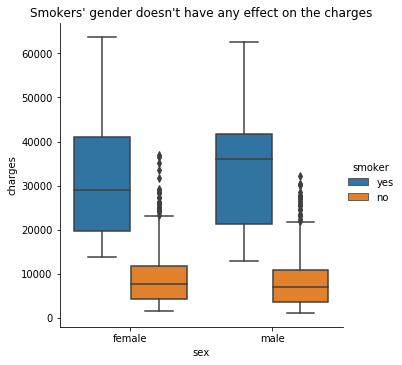

In [18]:
sns.catplot(x="sex", y="charges", data=df, hue="smoker", kind="box")
plt.title("Smokers' gender doesn't have any effect on the charges")

Let's look at the age range of the datasets.

In [23]:
print("Age is between ", df["age"].min(), "-", df["age"].max())

Age is between  18 - 64


Is there a correlation between `age` and `smoker` and its' `charges`?

Text(0.5, 1.0, 'Smokers across the age has higher charges')

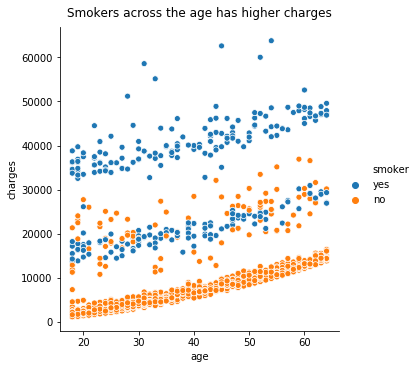

In [47]:
sns.relplot(x="age", y = "charges", data=df, hue = "smoker")
plt.title("Smokers across the age has higher charges", pad=10)

As age increases, there is an increase in charge for both smokers and non-smokers.

Current definition of age groups are: **Millennials** between the ages of **18 and 34**; **Gen X** between the ages of **35 and 50**; **Baby Boomers**, aged **51 to 69**. Let's categorize them and look at the distribution according to the age group.

In [34]:
def age_group(row):
    if row['age'] < 34:
        val = "millenials"
    elif row['age'] > 50:
        val = "baby boomers"
    else:
        val = "gen x"
    return val

df["age_group"] = df.apply(age_group, axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_chart,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,overweight,millenials
1,18,male,33.770,1,no,southeast,1725.55230,obese,millenials
2,28,male,33.000,3,no,southeast,4449.46200,obese,millenials
3,33,male,22.705,0,no,northwest,21984.47061,normal,millenials
4,32,male,28.880,0,no,northwest,3866.85520,overweight,millenials


Text(0.5, 1.0, 'There are a lot of outliers for non-smokers.')

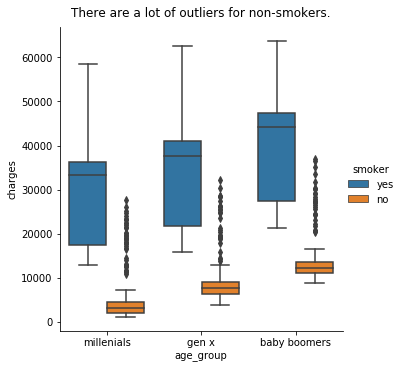

In [46]:
sns.catplot(x="age_group", y="charges", data=df, hue="smoker", kind="box", 
            order=["millenials", "gen x", "baby boomers"])
plt.title("There are a lot of outliers for non-smokers.", pad=10)
# plt.suptitle("We might want to investigate why but the limited dataset doesn't allow us to", fontsize=11)

We might want to investigate the outliers, finding causes of high `charges`. The limited dataset doesn't allow us to do so however.

## Predicting charges

Using linear regression, I believe that we can predict the charges based on the features that we have from the dataset.

In [70]:
encoded_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

model = LinearRegression()
scaler = StandardScaler()

X = encoded_df.drop(["charges"], axis=1)
y = encoded_df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled,y_train)
model.score(X_train_scaled, y_train)

0.7337162219022217

In [162]:
model.score(X_test_scaled, y_test)

0.7962732059725786

In [163]:
y_pred = model.predict(X_test_scaled)

In [164]:
from sklearn.metrics import r2_score, mean_squared_error

print("R2: ", r2_score(y_test, y_pred))
# print("MSE: ", mean_squared_error(y_test,y_pred))

R2:  0.7962732059725786


I think we can improve the score with introducing polynomial features of our data

In [165]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

for degree in range(1,4):
    poly_model = make_pipeline(PolynomialFeatures(degree, interaction_only=True),
                           LinearRegression())
    poly_model.fit(X_train_scaled, y_train)
    y_pred = poly_model.predict(X_test_scaled)
    print("Degree:", degree)
    print("No. Coeffs:", len(poly_model.steps[1][1].coef_))
    print("R2 Train:",poly_model.score(X_train_scaled, y_train))
    print("R2 Test:",poly_model.score(X_test_scaled, y_test))
#     print("MSE: ", mean_squared_error(y_test,y_pred))
    print(" ")


Degree: 1
No. Coeffs: 7
R2 Train: 0.7337162219022217
R2 Test: 0.7962732059725784
 
Degree: 2
No. Coeffs: 22
R2 Train: 0.8281621924448295
R2 Test: 0.8799637112714337
 
Degree: 3
No. Coeffs: 42
R2 Train: 0.8321007102820845
R2 Test: 0.8742323722721299
 


With higher complexity, in this case, 2 degree polynomial, we are able to improve the score of our regression.